In [4]:
# Part 1

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing, metrics

%matplotlib inline

from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.preprocessing import Normalizer
from keras.models import Sequential

from keras import regularizers

In [6]:
# Load Dataset
diabetesDataFrame = pd.read_csv('/content/diabetes.csv')
print (diabetesDataFrame.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


# New section

In [7]:
# shuffled dataset
# randomData = diabetesDataFrame.sample(frac=1)
# print(randomData)
randomData = diabetesDataFrame

In [8]:
# Split features & outcome
Y = randomData.Outcome
X = randomData.drop('Outcome', axis = 1 )


In [9]:
# Split data
# 60 for training, 20 for test, 20 for validation
X_train, X_remaining, Y_train, Y_remaining = model_selection.train_test_split(X, Y, train_size = 0.60,random_state=5)
X_val, X_test, Y_val, Y_test = model_selection.train_test_split(X_remaining, Y_remaining, test_size = 0.50)
print(X_train)


     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
737            8       65             72  ...  32.0                     0.600   42
325            1      157             72  ...  25.6                     0.123   24
697            0       99              0  ...  25.0                     0.253   22
748            3      187             70  ...  36.4                     0.408   36
466            0       74             52  ...  27.8                     0.269   22
..           ...      ...            ...  ...   ...                       ...  ...
73             4      129             86  ...  35.1                     0.231   23
400            4       95             64  ...  32.0                     0.161   31
118            4       97             60  ...  28.2                     0.443   22
701            6      125             78  ...  27.6                     0.565   49
206            8      196             76  ...  37.5                     0.605   57

[46

In [10]:
# Dataframe to values
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values
X_val = X_val.values
Y_val = Y_val.values
print(X_train)

[[8.00e+00 6.50e+01 7.20e+01 ... 3.20e+01 6.00e-01 4.20e+01]
 [1.00e+00 1.57e+02 7.20e+01 ... 2.56e+01 1.23e-01 2.40e+01]
 [0.00e+00 9.90e+01 0.00e+00 ... 2.50e+01 2.53e-01 2.20e+01]
 ...
 [4.00e+00 9.70e+01 6.00e+01 ... 2.82e+01 4.43e-01 2.20e+01]
 [6.00e+00 1.25e+02 7.80e+01 ... 2.76e+01 5.65e-01 4.90e+01]
 [8.00e+00 1.96e+02 7.60e+01 ... 3.75e+01 6.05e-01 5.70e+01]]


In [11]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)
print("Shape of X_val : ", X_val.shape)
print("Shape of Y_yal : ", Y_val.shape)

Shape of X_train :  (460, 8)
Shape of Y_train :  (460,)
Shape of X_test :  (154, 8)
Shape of Y_test :  (154,)
Shape of X_val :  (154, 8)
Shape of Y_yal :  (154,)


In [12]:
# Reshaping data

X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

X_val = X_val.T
Y_val = Y_val.reshape(1, X_val.shape[1])

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(8, 460)
(1, 460)
(8, 154)
(1, 154)
(8, 154)
(1, 154)


In [13]:
# Sigmoid Function
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [14]:
def model_accuracy(X, Y, Weight, Bias, data_type):

    Z = np.dot(Weight.T, X) + Bias
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

    return acc;
      


In [15]:
# Train Model Function
def logRegModel_train(X, Y, learningRate, loop):
  m = X_train.shape[1]
  n = X_train.shape[0]

  Weight = np.zeros((n,1))
  bias = 0.1

  cost_epoch = list()
  accur = list()

  for i in range(loop):
    Z = np.dot(Weight.T, X) + bias
    A = sigmoid(Z)

    cost_training = -(1/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))

    dW = (1/m)*np.dot(A-Y, X.T)
    db = (1/m)*np.sum(A-Y)

    Weight = Weight - learningRate*dW.T
    bias = bias - learningRate*db
    ac = model_accuracy(X_test, Y_test, Weight, bias,'no print')

    accur.append(ac)

    cost_epoch.append(cost_training)
    if((i%(loop/10)==0)):
      print('Cost Update after ', i, 'loop is : ', cost_training)

  return Weight,bias, cost_epoch, accur


In [16]:
iterations = 1000000
learning_rate = 0.0001
Weight, Bias, cost_list_train, train_accuracy = logRegModel_train(X_train, Y_train, learningRate = learning_rate, loop = iterations)
Wv, Bv, cost_list_validate, validation_accuracy = logRegModel_train(X_val, Y_val, learningRate = learning_rate, loop = iterations)


Cost Update after  0 loop is :  0.7080923122474841
Cost Update after  100000 loop is :  0.5841594140584926
Cost Update after  200000 loop is :  0.5719224496626524
Cost Update after  300000 loop is :  0.5611301778553368
Cost Update after  400000 loop is :  0.5515908308659421
Cost Update after  500000 loop is :  0.5431394248560204
Cost Update after  600000 loop is :  0.5356339982035464
Cost Update after  700000 loop is :  0.5289523875068877
Cost Update after  800000 loop is :  0.5229894614270914
Cost Update after  900000 loop is :  0.5176547334059676
Cost Update after  0 loop is :  0.2376893166333259
Cost Update after  100000 loop is :  0.2052467877110793
Cost Update after  200000 loop is :  0.20310866217914786
Cost Update after  300000 loop is :  0.20107122131851923
Cost Update after  400000 loop is :  0.19912749836967827
Cost Update after  500000 loop is :  0.19727136787745742
Cost Update after  600000 loop is :  0.19549740111926636
Cost Update after  700000 loop is :  0.19380074843899

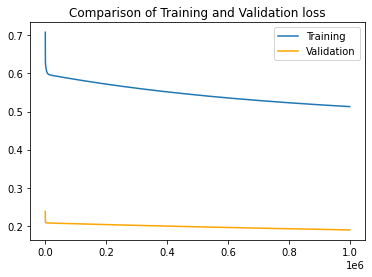

In [17]:
# Plotting graph For Training & Validation loss
plt.plot(np.arange(iterations), cost_list_train, label='Training')
plt.plot(np.arange(iterations), cost_list_validate, color='orange', label='Validation')
plt.title('Comparison of Training and Validation loss')
plt.legend(loc='upper right')
plt.show()

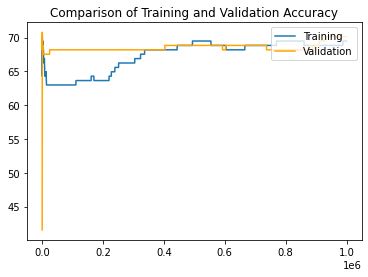

In [18]:
# Plotting graph For Training & Validation Accuracy
plt.plot(np.arange(iterations), train_accuracy, label='Training')
plt.plot(np.arange(iterations), validation_accuracy, color='orange', label='Validation')
plt.title('Comparison of Training and Validation Accuracy')
plt.legend(loc='upper right')
plt.show()

In [19]:
# Accuracy for test data
t_acc = model_accuracy(X_test, Y_test, Weight, Bias, 'test')
print("Accuracy of the Test model is : ", round(t_acc, 2), "%")

# Accuracy for validation data
v_acc = model_accuracy(X_val, Y_val, Wv, Bv, 'train')
print("Accuracy of the Test model is : ", round(v_acc, 2), "%")


Accuracy of the Test model is :  69.48 %
Accuracy of the Test model is :  73.38 %


In [20]:
# Part 2

In [21]:
# Neural Network Model

model = Sequential()

# Input Layer
model.add(Dense(64, input_dim=8, activation='relu'))

# Hidden Layer
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(10, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid' ))

In [22]:
# Compile Function
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',  metrics=['accuracy'])

In [23]:
# Fit Function
history = model.fit(X_train.T,
                    Y_train.T,
                    epochs=100, batch_size=30,
                    validation_data=(X_test.T, Y_test.T),
                    verbose=2)

Epoch 1/100
16/16 - 1s - loss: 9.0951 - accuracy: 0.5522 - val_loss: 8.1970 - val_accuracy: 0.6494
Epoch 2/100
16/16 - 0s - loss: 7.8662 - accuracy: 0.5891 - val_loss: 7.3277 - val_accuracy: 0.6883
Epoch 3/100
16/16 - 0s - loss: 6.9535 - accuracy: 0.6304 - val_loss: 6.4952 - val_accuracy: 0.6883
Epoch 4/100
16/16 - 0s - loss: 6.1572 - accuracy: 0.6326 - val_loss: 5.7362 - val_accuracy: 0.6883
Epoch 5/100
16/16 - 0s - loss: 5.4556 - accuracy: 0.6370 - val_loss: 5.0860 - val_accuracy: 0.6883
Epoch 6/100
16/16 - 0s - loss: 4.8131 - accuracy: 0.6500 - val_loss: 4.4899 - val_accuracy: 0.6558
Epoch 7/100
16/16 - 0s - loss: 4.2796 - accuracy: 0.6370 - val_loss: 3.9828 - val_accuracy: 0.6429
Epoch 8/100
16/16 - 0s - loss: 3.8139 - accuracy: 0.6283 - val_loss: 3.5391 - val_accuracy: 0.6818
Epoch 9/100
16/16 - 0s - loss: 3.4071 - accuracy: 0.6587 - val_loss: 3.1996 - val_accuracy: 0.6429
Epoch 10/100
16/16 - 0s - loss: 3.0899 - accuracy: 0.6500 - val_loss: 2.9004 - val_accuracy: 0.6558
Epoch 11/

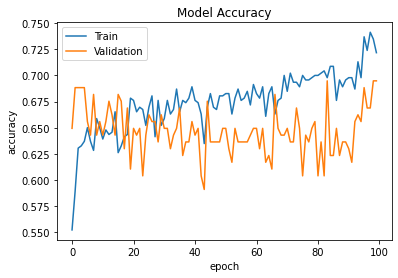

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

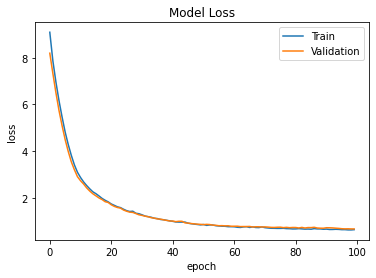

In [25]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [26]:
print("Accuracy is:",history.history['accuracy'][-1]*100, "%" )

Accuracy is: 72.1739113330841 %


In [27]:
# Part 3

In [28]:
# Model with More Parametres


In [29]:
# Model with l2 & Dropout

model1 = Sequential()

# Input Layer
model1.add(Dense(64, input_dim=8, activation='relu'))

# Hidden Layers
model1.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(Dropout(0.25))
model1.add(Dense(10, activation='relu'))

# Output Layer
model1.add(Dense(1, activation='sigmoid' ))

In [30]:
# Compile Function
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',  metrics=['accuracy'])

In [31]:
# Fit Function
history1 = model1.fit(X_train.T,
                    Y_train.T,
                    epochs=100, batch_size=30,
                    validation_data=(X_test.T, Y_test.T),
                    verbose=2)

Epoch 1/100
16/16 - 1s - loss: 3.5388 - accuracy: 0.4543 - val_loss: 1.6554 - val_accuracy: 0.6429
Epoch 2/100
16/16 - 0s - loss: 1.8447 - accuracy: 0.6043 - val_loss: 1.3440 - val_accuracy: 0.6883
Epoch 3/100
16/16 - 0s - loss: 1.3449 - accuracy: 0.6283 - val_loss: 1.2725 - val_accuracy: 0.6883
Epoch 4/100
16/16 - 0s - loss: 1.2647 - accuracy: 0.6326 - val_loss: 1.2121 - val_accuracy: 0.6883
Epoch 5/100
16/16 - 0s - loss: 1.1853 - accuracy: 0.6326 - val_loss: 1.1653 - val_accuracy: 0.6883
Epoch 6/100
16/16 - 0s - loss: 1.1845 - accuracy: 0.6370 - val_loss: 1.1255 - val_accuracy: 0.6883
Epoch 7/100
16/16 - 0s - loss: 1.1625 - accuracy: 0.6370 - val_loss: 1.0988 - val_accuracy: 0.6883
Epoch 8/100
16/16 - 0s - loss: 1.1096 - accuracy: 0.6370 - val_loss: 1.0661 - val_accuracy: 0.6883
Epoch 9/100
16/16 - 0s - loss: 1.0946 - accuracy: 0.6348 - val_loss: 1.0467 - val_accuracy: 0.6883
Epoch 10/100
16/16 - 0s - loss: 1.0557 - accuracy: 0.6348 - val_loss: 1.0290 - val_accuracy: 0.6883
Epoch 11/

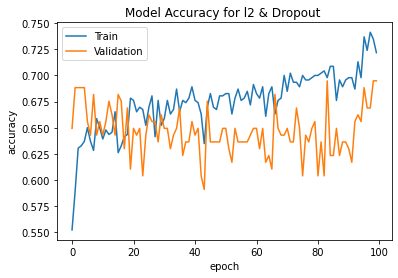

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy for l2 & Dropout ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

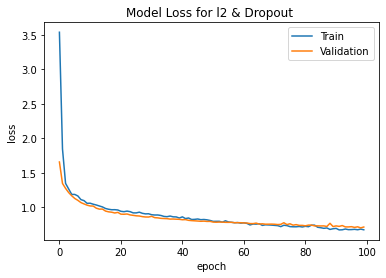

In [33]:
# Model Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss for l2 & Dropout ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [34]:
print("Accuracy for l2 & Dropout is:",history1.history['accuracy'][-1]*100, "%" )

Accuracy for l2 & Dropout is: 67.8260862827301 %


In [35]:
# Model with l1 & Dropout

model2 = Sequential()

# Input Layer
model2.add(Dense(64, input_dim=8, activation='relu'))

# Hidden Layers
model1.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model2.add(Dropout(0.20))
model2.add(Dense(10, activation='relu'))

# Output Layer
model2.add(Dense(1, activation='sigmoid' ))

In [36]:
# Compile Function
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',  metrics=['accuracy'])

In [37]:
# Fit Function
history2 = model2.fit(X_train.T,
                    Y_train.T,
                    epochs=100, batch_size=30,
                    validation_data=(X_test.T, Y_test.T),
                    verbose=2)

Epoch 1/100
16/16 - 1s - loss: 9.0385 - accuracy: 0.6130 - val_loss: 2.3438 - val_accuracy: 0.6104
Epoch 2/100
16/16 - 0s - loss: 3.8369 - accuracy: 0.5152 - val_loss: 1.3576 - val_accuracy: 0.6364
Epoch 3/100
16/16 - 0s - loss: 2.4344 - accuracy: 0.5630 - val_loss: 1.1629 - val_accuracy: 0.6883
Epoch 4/100
16/16 - 0s - loss: 2.3051 - accuracy: 0.5413 - val_loss: 0.9417 - val_accuracy: 0.6688
Epoch 5/100
16/16 - 0s - loss: 1.7859 - accuracy: 0.5696 - val_loss: 0.8283 - val_accuracy: 0.6818
Epoch 6/100
16/16 - 0s - loss: 1.4790 - accuracy: 0.5826 - val_loss: 0.8899 - val_accuracy: 0.6688
Epoch 7/100
16/16 - 0s - loss: 1.7153 - accuracy: 0.5696 - val_loss: 0.8848 - val_accuracy: 0.6494
Epoch 8/100
16/16 - 0s - loss: 1.5734 - accuracy: 0.5804 - val_loss: 0.8377 - val_accuracy: 0.6688
Epoch 9/100
16/16 - 0s - loss: 1.4916 - accuracy: 0.5674 - val_loss: 0.7864 - val_accuracy: 0.6753
Epoch 10/100
16/16 - 0s - loss: 1.4180 - accuracy: 0.5935 - val_loss: 0.7382 - val_accuracy: 0.6688
Epoch 11/

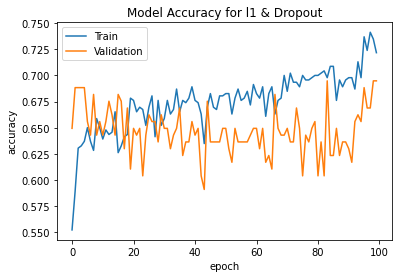

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy for l1 & Dropout')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

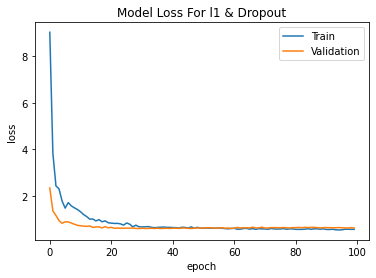

In [39]:
# Model Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss For l1 & Dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [40]:
print("Accuracy for l1 & Dropout is:",history2.history['accuracy'][-1]*100, "%" )

Accuracy for l1 & Dropout is: 74.7826099395752 %
